**CANADIAN SOCIETY FOR MECHANICAL ENGINEERING INTERNATIONAL CONGRESS**

**June 5 - 8, 2022, University of Alberta, Edmonton, Canada**


# L01- Neural Network with TensorFlow 2.x

- This notebook was prepared for Machine Learning workshop
- The notebook and examples are developed by **Armin Norouzi**



Table of Contents:

- Neural Network Regression with TensorFlow -- Toy Example
- Neural Network Regression with TensorFlow -- Real World example
- Importing network in Matlab to design MPC controller

**What is the Jupyter Notebook?**

Notebook documents (or “notebooks”, all lower case) are documents produced by the Jupyter Notebook App, which contain both computer code (e.g. python) and rich text elements (paragraph, equations, figures, links, etc…). 



### Typical architecture of a regresison neural network



- The word *typical* is on purpose! Because there are many different ways (actually, there's almost an infinite number of ways) to write neural networks.

- But the following is a generic setup for ingesting a collection of numbers, finding patterns in them and then outputing some kind of target number.



| **Hyperparameter** | **Typical value** |
| --- | --- |
| Input layer shape | Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction) |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited |
| Neurons per hidden layer | Problem specific, generally 10 to 100 |
| Output layer shape | Same shape as desired prediction shape (e.g. 1 for house price) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) |
| Output activation | None, ReLU, logistic/tanh |
| Loss function | [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (mean square error) or [MAE](https://en.wikipedia.org/wiki/Mean_absolute_error) (mean absolute error)/Huber (combination of MAE/MSE) if outliers |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) |

***Table 1:*** *Typical architecture of a regression network.* ***Source:*** *Adapted from page 293 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*


- To use TensorFlow, we will import it as the common alias `tf` (short for TensorFlow).

In [12]:
import tensorflow as tf
print(tf.__version__) # check the current version (should be 2.x+)

2.8.2


**Regression input shapes and output shapes**

- One of the most important concepts when working with neural networks are the input and output shapes.

- The **input shape** is the shape of your data that goes into the model.

- The **output shape** is the shape of your data you want to come out of your model.


## Neural Network Regression with TensorFlow -- Toy Example

Let's create a simple data set first

#### Create dataset

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

# Make inputs
X = np.arange(-100, 100, 4)


# Make labels for the dataset (y = x + 10)
y = np.arange(-90, 110, 4)

# we used y = x  + 10 to create labels and NN will approximate this function

print("X=", X)
print("y=", y)

X= [-100  -96  -92  -88  -84  -80  -76  -72  -68  -64  -60  -56  -52  -48
  -44  -40  -36  -32  -28  -24  -20  -16  -12   -8   -4    0    4    8
   12   16   20   24   28   32   36   40   44   48   52   56   60   64
   68   72   76   80   84   88   92   96]
y= [-90 -86 -82 -78 -74 -70 -66 -62 -58 -54 -50 -46 -42 -38 -34 -30 -26 -22
 -18 -14 -10  -6  -2   2   6  10  14  18  22  26  30  34  38  42  46  50
  54  58  62  66  70  74  78  82  86  90  94  98 102 106]


#### Split data into training/test set




* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the

In [14]:
# Check how many samples we have
len(X)

50

In [15]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

#### Visualizing the data

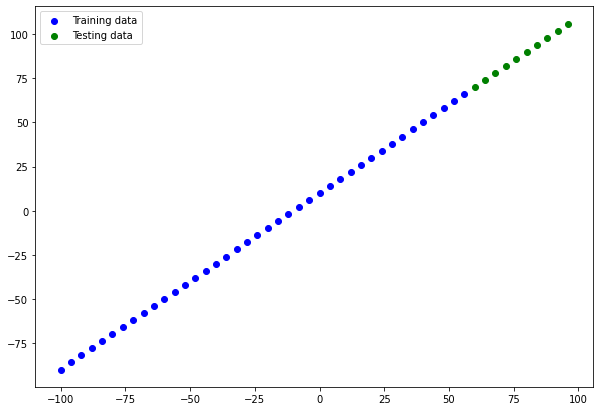

In [16]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Testing data')
# Show the legend
plt.legend();

#### Bulding model

Now we know what data we have as well as the input and output shapes, let's see how we'd build a neural network to model it.

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the [Functional](https://www.tensorflow.org/guide/keras/functional) or [Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer). 
3. **Fitting a model** - letting the model try to find patterns in the data (how does `X` get to `y`). 

Let's see these in action using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) to build a model for our regression data. And then we'll step through each.

> **Note:** If you're using [TensorFlow 2.7.0](https://github.com/tensorflow/tensorflow/releases/tag/v2.7.0)+, the `fit()` function no longer upscales input data to go from `(batch_size, )` to `(batch_size, 1)`. To fix this, you'll need to expand the dimension of input data using `tf.expand_dims(input_data, axis=-1)`.
>
> In our case, this means instead of using `model.fit(X, y, epochs=5)`, use `model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)`. 


In [17]:
# Set random seed for reproducing purpuse
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])


# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Summary of model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Calling `summary()` on our model shows us the layers it contains, the output shape and the number of parameters.
* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

**Question:** What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, `keras` comes after `tf` (e.g. `tf.keras.layers.Dense()`)?

Before TensorFlow 2.0+, [Keras](https://keras.io/) was an API designed to be able to build deep learning models with ease. Since TensorFlow 2.0+, its functionality has been tightly integrated within the TensorFlow library.

**Question:** What's Dense? 

Just your regular densely-connected NN layer. Here is definition if TF documentation ([tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense))



```
tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
```

**Let's fit our model to data**




In [18]:
# Fit model
history = model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
2/2 [==============================] - 0s 12ms/step - loss: 19.0311 - mae: 19.0311
Epoch 2/10
2/2 [==============================] - 0s 12ms/step - loss: 10.8111 - mae: 10.8111
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 14.5005 - mae: 14.5005
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 10.0958 - mae: 10.0958
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 15.5388 - mae: 15.5388
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 11.8626 - mae: 11.8626
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 9.1727 - mae: 9.1727
Epoch 8/10
2/2 [==============================] - 0s 13ms/step - loss: 13.6143 - mae: 13.6143
Epoch 9/10
2/2 [==============================] - 0s 10ms/step - loss: 13.8577 - mae: 13.8577
Epoch 10/10
2/2 [==============================] - 0s 11ms/step - loss: 9.9966 - mae: 9.9966


We started with 19.0311 loss in first epochs and ends with 14.9966! Not that much improvement! 


**Evaluating model**


A typical workflow you'll go through when building neural networks is:

```
Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...
```


**Function for plotting**

In [19]:
# Make predictions
y_preds = model.predict(X_test)


In [20]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

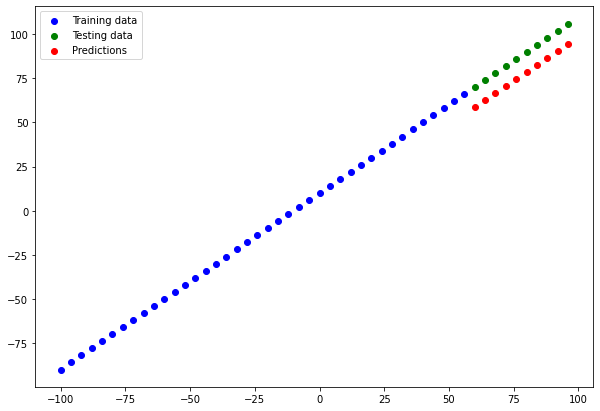

In [21]:

plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

Very poor model! We can now add neurons and layers to make a more sophisticated model!

Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics. 

Two of the main metrics used for regression problems are:
* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.


**We can create function to calculate MAE and MSE:**

In [22]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

In [23]:
print("MAE:", mae(y_test, y_preds.squeeze()).numpy())
print("MSE:", mse(y_test, y_preds.squeeze()).numpy())

MAE: 11.407842
MSE: 130.19061


**Plotting loss vs epochs**

- Before trying to improve model, let's learn how to plot loss vs epochs
- To do this, we need to assign model.fit to a variable such as `history`



Evaluation of `history`:

In [24]:
history.history.keys()

dict_keys(['loss', 'mae'])

So we can plot both loss and metrics we defined in `compile` using `history`

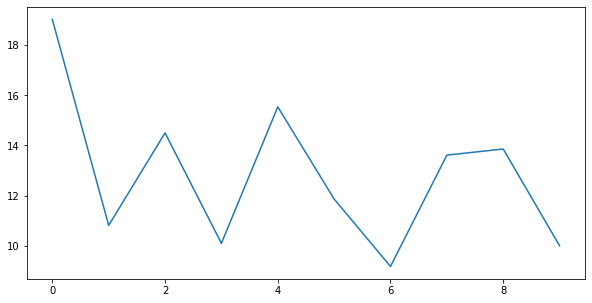

In [25]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])

#### Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, but trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

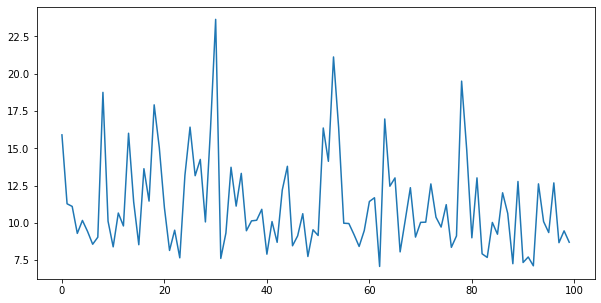

In [26]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history_1 = model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0)


plt.figure(figsize=(10,5))
plt.plot(history_1.history['loss'])

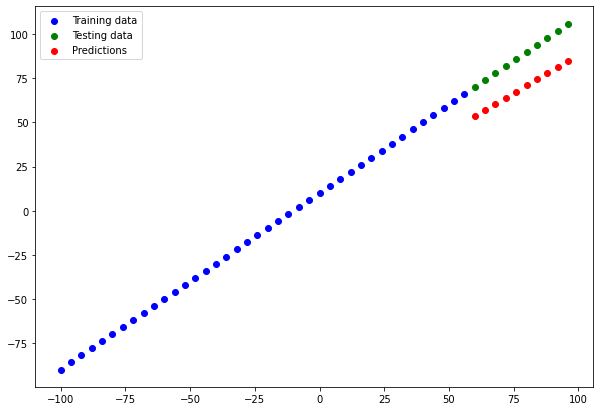

In [27]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [28]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

**Build `model_2`**

This time we'll add an extra dense layer (so now our model will have 2 layers) whilst keeping everything else the same.

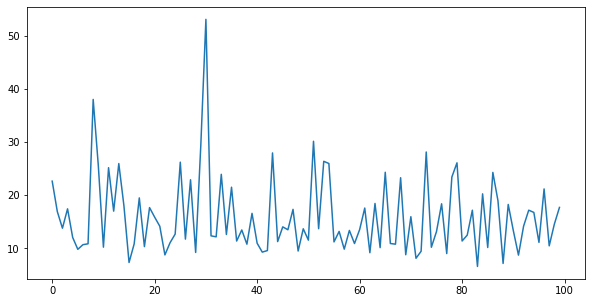

In [29]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), 
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history_2 = model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose = 0)


plt.figure(figsize=(10,5))
plt.plot(history_2.history['loss'])

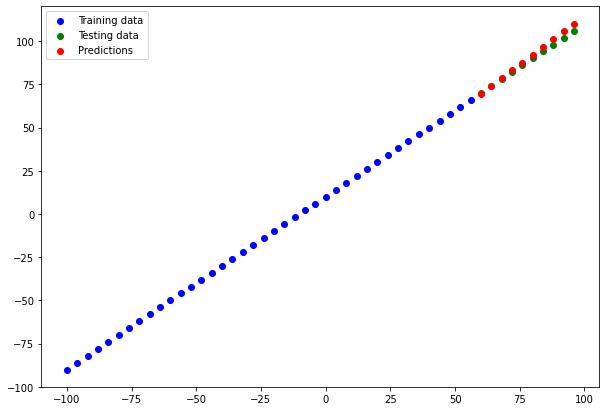

In [30]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [31]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9098114, 5.459232)

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

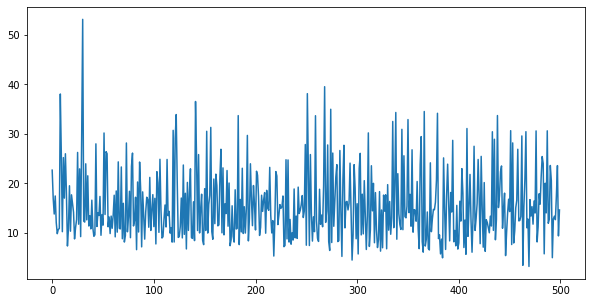

In [32]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1), 
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
history_3 = model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose = 0)


plt.figure(figsize=(10,5))
plt.plot(history_3.history['loss'])

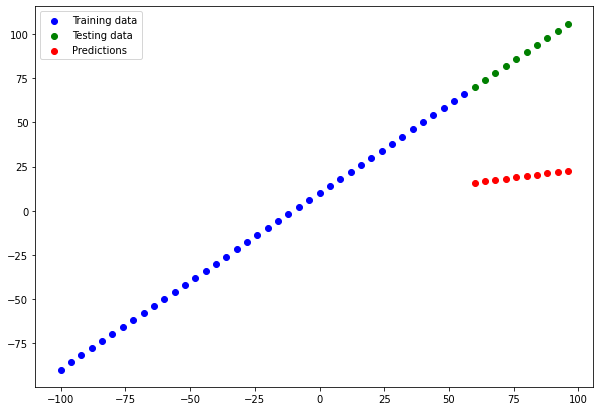

In [33]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [34]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68786, 4804.4717)

#### Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [35]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [36]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909811,5.459232
2,model_3,68.687859,68.687859


From our experiments, it looks like `model_2` performed the best.

And now, you might be thinking, "wow, comparing models is tedious..." and it definitely can be, we've only compared 3 models here. 

But this is part of what machine learning modelling is about, trying many different combinations of models and seeing which performs best.

Each model you build is a small experiment. 

#### Saving a model

You can save a TensorFlow/Keras model using [`model.save()`](https://www.tensorflow.org/tutorials/keras/save_and_load#save_the_entire_model).

There are two ways to save a model in TensorFlow:
1. The [SavedModel format](https://www.tensorflow.org/tutorials/keras/save_and_load#savedmodel_format) (default).
2. The [HDF5 format](https://www.tensorflow.org/tutorials/keras/save_and_load#hdf5_format).

The main difference between the two is the SavedModel is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

Which one should you use?

It depends on your situation but the here we use HDF5 format. 

In [37]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") 

In [38]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


#### Loading a model

We can load a saved model using the [`load_model()`](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model) method.

In [39]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)

In [41]:
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, y_preds_2.squeeze()).numpy()

True

#### Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:
* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [42]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Neural Network Regression with TensorFlow -- Real World example

In [43]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/arminnorouzi/CSME2022_workshops/main/L00_data/Transient_data.csv') # You need to edit this directory
data.head()

,time,SOI,FQ,Load
0,0.00,-3.8,24.6,0.001000
1,0.08,-3.8,24.6,123.612898
2,0.16,-3.8,24.6,154.786556
3,0.24,-3.8,24.6,155.228298
4,0.32,-3.8,24.6,155.283862


This is a transient data, so we can plot it over time or over each engine cycle (0.08 second)

Text(0, 0.5, 'Load [N.m]')

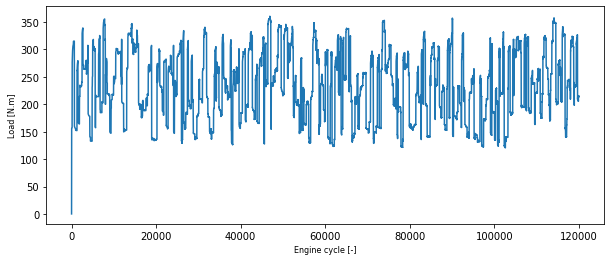

In [44]:
area = 300
# area = 200
plt.figure(1, figsize=(10, 4))
plt.plot(data['Load'])

plt.xlabel('Engine cycle [-]', fontsize=8)
plt.ylabel('Load [N.m]', fontsize=8)

In [45]:
X = np.asanyarray(data[['SOI','FQ']])
Y = np.asanyarray(data[['Load']])
len(X)

120001

In [46]:
# Split data into train and test sets


X_train = X[:90000] # first 90000 cycles (75% of data)
y_train = Y[:90000]

X_test = X[90000:] # last 30000 cycles (25% of data)
y_test = Y[90000:]

len(X_train), len(X_test)



from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_test_minmax = min_max_scaler.transform(X_test)

In [47]:
min_max_scaler.data_max_

array([ 2. , 59.7])

In [48]:
min_max_scaler.data_min_

array([-9.9, 20. ])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                96        
                                                                 
 dense_8 (Dense)             (None, 16)                528       
                                                                 
 Output_Layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


Text(0.5, 1.0, 'loss')

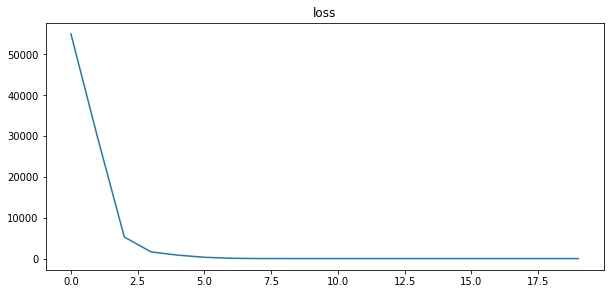

In [49]:
# Let's try with sigmoid activation function

# Set random seed
tf.random.set_seed(42)

# Create a model
model_load = tf.keras.Sequential([
  tf.keras.layers.InputLayer(input_shape = (X_train_minmax.shape[1], )),
  tf.keras.layers.Dense(32, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1, name ="Output_Layer")
])

# Compile the model
model_load.compile(loss=tf.keras.losses.mse, # here we used MSE because MAE is not supported by Matlab
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['mse'])



# Fit the model
history = model_load.fit(X_train_minmax, y_train, epochs=20, verbose=0)

model_load.summary()


plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.title("loss")





In [50]:
X_train_minmax.shape, y_train.shape

((90000, 2), (90000, 1))

Text(0, 0.5, 'Load [N.m]')

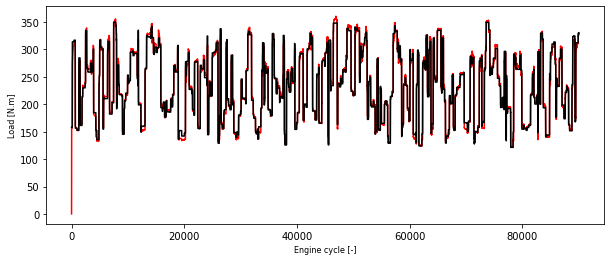

In [51]:
y_train_hat = model_load.predict(X_train_minmax)

plt.figure(1, figsize=(10, 4))
plt.plot(y_train, 'r')
plt.plot(y_train_hat, 'k')

plt.xlabel('Engine cycle [-]', fontsize=8)
plt.ylabel('Load [N.m]', fontsize=8)

Text(0, 0.5, 'Load [N.m]')

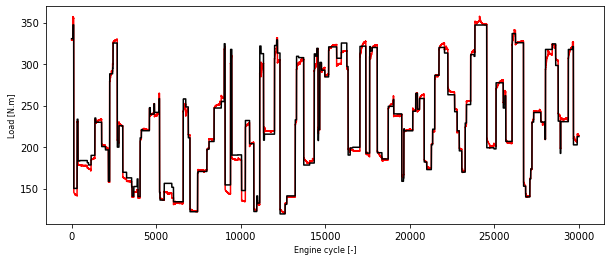

In [52]:
y_test_hat = model_load.predict(X_test_minmax)

plt.figure(1, figsize=(10, 4))
plt.plot(y_test, 'r')
plt.plot(y_test_hat, 'k')

plt.xlabel('Engine cycle [-]', fontsize=8)
plt.ylabel('Load [N.m]', fontsize=8)

Save this model for later MPC implementation demo

In [53]:
# Save a model using the HDF5 format
model_load.save("DNNmodel_MPC.h5") # note the addition of '.h5' on the end

files.download("DNNmodel_MPC.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Importing network in Matlab to design MPC controller

Import pretrained Keras network and weights



```
net = importKerasNetwork(modelfile)
```



- `net` = `importKerasNetwork(modelfile)` imports a pretrained TensorFlow-Keras network and its weights from modelfile.

- This function requires the Deep Learning Toolbox™ Converter for TensorFlow Models support package. If this support package is not installed, the function provides a download link.

 In this case, modelfile can be in HDF5 or JSON format, and the weight file must be in HDF5 format.

Check Mathwork documentation for more detail and workshop to how to use developed network in Matlab [importKerasNetwork](https://www.mathworks.com/help/deeplearning/ref/importkerasnetwork.html;jsessionid=4a554c9635666ea73eeee66f2712)



## Reference

[1] [Neural Network Regression with TensorFlow](https://dev.mrdbourke.com/tensorflow-deep-learning/01_neural_network_regression_in_tensorflow/)

[2] [Neural Network Classification with TensorFlow](https://dev.mrdbourke.com/tensorflow-deep-learning/02_neural_network_classification_in_tensorflow/)

[3] [Milestone Project 3: Time series forecasting in TensorFlow ](https://dev.mrdbourke.com/tensorflow-deep-learning/10_time_series_forecasting_in_tensorflow/)

[4] [Tensorflow Documentation for Python](https://www.tensorflow.org/)